<a href="https://colab.research.google.com/github/CaptainChuenthavorn/Data-Analytics2022s/blob/main/DA_Assignment_1_Version7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VERSION 1 = >
1. Drop outlier on x3 x8
2. Imputation with median
3. Drop outlier
4. replace imptation with mean
5. take log
6. Regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
A_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-train.csv"
A_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-test.csv"
B_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-train.csv"
B_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-test.csv"

In [ ]:
df = pd.read_csv(A_train_path)
df_ori = pd.read_csv(A_train_path)
df_test = pd.read_csv(A_test_path)

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,181.000000,180.000000,180.000000,1.810000e+02,180.000000,180.000000,180.000000,181.000000,188.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,386.982400,363.353742,453.783083,8.599234e+05,35.906821,32.370122,34.640373,31.525100,8.350511
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-62.680000,-61.442500,-60.385000,1.266650e+03,-6.060000,-4.710000,-5.907500,-7.200000,-2.260000
50%,12.210000,12.595000,1.815000,4.546800e+03,-0.760000,2.180000,-0.295000,-0.160000,3.555000
75%,75.650000,81.890000,53.740000,1.289133e+04,6.667500,8.462500,6.075000,6.600000,10.620000
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


In [ ]:
df['x1'].median()

12.21

Check NaN

#  drop x3 and x8 outlier

In [ ]:
df.isnull().sum().sum()

79

In [ ]:
df['x3'].isnull().sum()

10

In [ ]:
df.dropna(subset=['x3'], inplace=True)

In [ ]:
df['x3'].isnull().sum()

0

In [ ]:
df['x8'].isnull().sum()

9

In [ ]:
df.dropna(subset=['x8'], inplace=True)

In [ ]:
df['x8'].isnull().sum()

0

## 1. Imputation with median

In [ ]:
df.dropna(subset = ["y"], inplace=True)

In [ ]:
med_value_list = []
med_value_list_test=[]
for j in range(8):
  col_name = 'x'+str(j+1)
  
  med_value=df[col_name].median()
  med_value_list.append(med_value)
  print(col_name,'mean value',med_value)
  
  df[col_name].fillna(value=med_value,inplace=True)


  med_value_test=df_test[col_name].median()
  med_value_list_test.append(med_value_test)
  print(col_name,'mean value',med_value_test)
  
  df_test[col_name].fillna(value=med_value_test,inplace=True)

x1 mean value 9.42
x1 mean value 12.02
x2 mean value 11.27
x2 mean value 17.79
x3 mean value 5.01
x3 mean value -16.47
x4 mean value 4371.325000000001
x4 mean value 2401.98
x5 mean value -1.105
x5 mean value -0.91
x6 mean value 2.21
x6 mean value -1.04
x7 mean value -0.405
x7 mean value -1.36
x8 mean value -0.16
x8 mean value -0.83


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#df.dropna(subset = ["y"], inplace=True)

In [ ]:
df.isnull().sum().sum()

0

## 2. Handle Outlier CAP this out

In [ ]:
len(df.index)

169

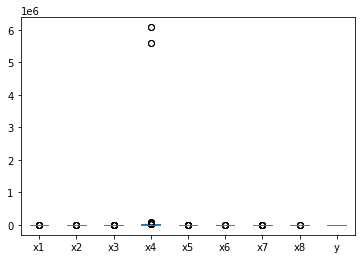

In [ ]:
df.plot.box()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
print(len(df.index))

169


In [ ]:
for j in range(2):
  col_name = 'x'+str(j+1)
  df = remove_outlier(df,col_name)
  print('fill',col_name,'sucess!')

fill x1 sucess!
fill x2 sucess!


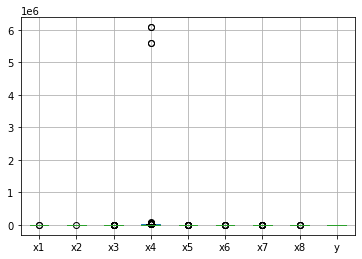

In [ ]:
df.boxplot()

In [ ]:
print(len(df.index))

158


In [ ]:
def cap_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lst=[fence_low,fence_high]

    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high

In [ ]:
for i in range(8):
  col_name = 'x'+str(i+1)
  
  fence_low,fence_high = cap_outlier(df,col_name)
  print(fence_low,fence_high)
  df[col_name].values[df[col_name].values < fence_low] = fence_low
  df[col_name].values[df[col_name].values > fence_high] = fence_high


-229.32625000000002 246.06375000000003
-247.87625 272.71375
-239.26375000000002 232.98624999999998
-14140.975 27004.505
-22.4675 23.7325
-21.224999999999998 26.074999999999996
-22.371249999999996 22.498749999999998
-29.869999999999997 28.09


In [ ]:
print(len(df.index))

158


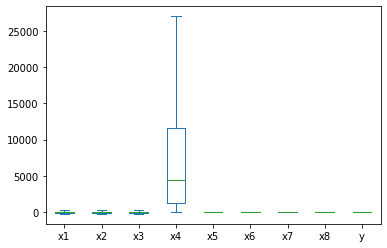

In [ ]:
df.plot.box()

##3. replace imptation with mean

In [ ]:
meanvalue=df['x1'].mean()
meanvalue


10.738908227848102

In [ ]:
med=med_value_list[0]

In [ ]:
df.loc[df['x1']==med_value_list[0]]

,x1,x2,x3,x4,x5,x6,x7,x8,y
30,9.42,-66.86,232.98625,3846.480,8.320,2.67,8.20,-0.93,7.35
34,9.42,-143.41,-100.46000,15.920,-5.380,-4.09,-4.35,16.27,-9.47
40,9.42,-2.53,232.98625,4248.430,5.970,10.83,-14.57,-5.78,28.20
74,9.42,-118.78,37.11000,5204.180,-13.350,8.83,-1.85,-14.85,10.34
85,9.42,4.64,-55.19000,27004.505,-1.105,-19.93,-2.69,-6.15,-3.73
93,9.42,85.91,56.77000,1265.220,-1.340,-8.27,13.29,-7.10,11.62
108,9.42,-64.39,232.98625,27004.505,1.830,-3.53,-8.74,-22.58,22.95
112,9.42,15.70,77.17000,6486.690,-7.900,13.45,-7.69,-12.97,18.23
149,9.42,158.81,19.37000,5444.960,7.720,-0.86,6.02,-18.19,10.70


In [ ]:
#df.loc[df.x1 == med_value_list[0], 'x1'] = meanvalue

In [ ]:
#df.loc[df['x1']==med_value_list[0]]

In [ ]:
#df.loc[df['x1']==med_value_list[1]]

In [ ]:
for j in range(8):
  col_name = 'x'+str(j+1)
  mean_value=df[col_name].mean()
  #df.loc[df[col_name]==med_value_list[i]] = meanvalue
  print(col_name,'mean value',mean_value)
  print('fill mean ',col_name,'sucess! :',meanvalue)

x1 mean value 10.738908227848102
fill mean  x1 sucess! : 10.738908227848102
x2 mean value 6.392935126582277
fill mean  x2 sucess! : 10.738908227848102
x3 mean value -1.013188291139242
fill mean  x3 sucess! : 10.738908227848102
x4 mean value 8218.27
fill mean  x4 sucess! : 10.738908227848102
x5 mean value 0.6180854430379746
fill mean  x5 sucess! : 10.738908227848102
x6 mean value 2.1787025316455697
fill mean  x6 sucess! : 10.738908227848102
x7 mean value -0.26667721518987336
fill mean  x7 sucess! : 10.738908227848102
x8 mean value -1.1755063291139243
fill mean  x8 sucess! : 10.738908227848102


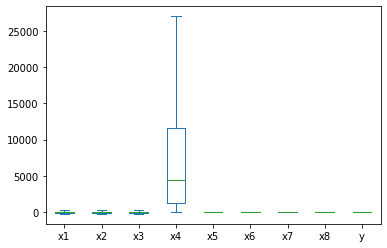

In [ ]:
df.plot.box()

## drop outlier again

In [ ]:
# for j in range(8):
#   col_name = 'x'+str(j+1)
#   df = remove_outlier(df,col_name)
#   print('fill',col_name,'sucess!')

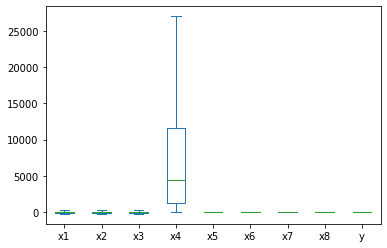

In [ ]:
df.plot.box()

In [ ]:
# print("ORIGINAL BELOW")
# df.describe()

In [ ]:
# print("MODIFIED BELOW")
# df_ori.describe()

In [ ]:
import seaborn as sns

In [ ]:
str_list=['x1','x2','x3','x4','x5','x6','x7','x8']

In [ ]:
# sns.pairplot(df[str_list],diag_kind="kde",corner=True)

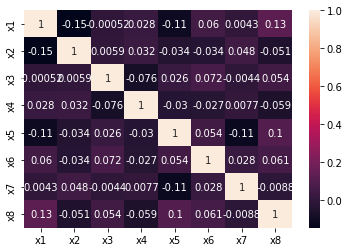

In [ ]:
sns.heatmap(df[str_list].corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      158 non-null    float64
 1   x2      158 non-null    float64
 2   x3      158 non-null    float64
 3   x4      158 non-null    float64
 4   x5      158 non-null    float64
 5   x6      158 non-null    float64
 6   x7      158 non-null    float64
 7   x8      158 non-null    float64
 8   y       158 non-null    float64
dtypes: float64(9)
memory usage: 12.3 KB


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,10.738908,6.392935,-1.013188,8218.270000,0.618085,2.178703,-0.266677,-1.175506,4.272405
std,91.622116,98.351475,96.142549,9351.519057,9.991493,9.708089,9.337375,10.860889,8.307211
min,-218.250000,-245.210000,-239.263750,0.480000,-22.467500,-21.225000,-22.371250,-29.870000,-15.180000
25%,-51.055000,-52.655000,-62.170000,1288.580000,-5.142500,-3.487500,-5.545000,-8.135000,-1.847500
50%,9.420000,11.270000,5.605000,4371.325000,-1.092500,2.210000,-0.405000,-0.495000,3.555000
75%,67.792500,77.492500,55.892500,11574.950000,6.407500,8.337500,5.672500,6.355000,10.767500
max,246.063750,272.713750,232.986250,27004.505000,23.732500,26.075000,22.498750,28.090000,28.200000


In [ ]:
# sns.pairplot(df)

In [ ]:
# sns.distplot(df['x4'])

In [ ]:
df.corr().sort_values("y")[["y"]]

,y
x8,-0.429537
x7,-0.081937
x5,-0.061746
x4,-0.060775
x2,-0.053752
x1,-0.000955
x6,0.111768
x3,0.536841
y,1.000000


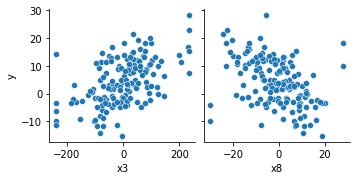

In [ ]:
sns.pairplot(df, x_vars=["x3","x8"], y_vars=["y"])

In [ ]:
# df.plot.scatter(x='x3',y='y')

In [ ]:
# df.plot.scatter(x='x8',y='y')

In [ ]:
# sns.pairplot(df, x_vars=["x3","x8"], y_vars=["y"])

In [ ]:
A_test = df_test[['x3','x8']]
x=df[['x3','x8']]
y=df['y']

In [ ]:
x

,x3,x8
0,-60.46,-17.13
1,23.30,-7.70
2,-75.27,8.65
4,-2.89,4.69
5,58.33,-13.11
...,...,...
185,-44.41,-11.73
186,53.26,-0.42
187,-20.96,3.23
188,-118.74,-10.44


In [ ]:
y

0       7.44
1       7.31
2      -5.77
4       4.31
5      16.03
       ...  
185    11.78
186     3.79
187    -3.17
188     0.97
189     1.44
Name: y, Length: 158, dtype: float64

In [ ]:
A_test

,x3,x8
0,-105.75,-7.43
1,91.05,10.59
2,-82.59,-4.73
3,-16.47,7.48
4,51.85,-0.78
5,-182.85,-8.59
6,97.28,-8.06
7,-220.91,9.71
8,-16.47,-0.83
9,69.88,-0.83


#Normalized

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
# scaler=preprocessing.StandardScaler().fit(X_train)

In [ ]:
# X_train = scaler.transform(X_train)

In [ ]:
# X_test = scaler.transform(X_test)

#Regression apply

In [ ]:
X_train

,x3,x8
134,94.65,1.49
29,35.96,0.30
7,-104.81,-29.87
63,16.75,-4.14
111,-14.18,-23.23
...,...,...
78,-36.58,1.45
86,90.39,-9.59
99,41.82,-2.00
13,12.79,4.25


In [ ]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
#train มี 114 test มี 76 รวมเปน 190

len(X_train) :  94
len(X_test) :  64
len(y_train) :  94
len(y_test) :  64


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([ 0.0433141 , -0.27808609])

In [ ]:
lm.intercept_

4.412704383455261

In [ ]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 0.043314095591932285 * x3    +
 -0.27808608580396654 * x8    +
 4.412704383455261


#predict

In [ ]:
X_train=df[['x3','x8']]
y_train=df['y']
A_test=df_test[['x3','x8']]
lm = LinearRegression()
lm.fit(X_train,y_train)
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

print("len(X_train) : ", len(X_train))
#print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
#print("len(y_test) : ", len(y_test))
print(len(df.index))
print(len(df_ori.index))

LM MODEL

y =
 0.04853195226978597 * x3    +
 -0.3517456395130211 * x8    +
 3.908097843591234
len(X_train) :  158
len(y_train) :  158
158
190


In [ ]:
A_test

,x3,x8
0,-105.75,-7.43
1,91.05,10.59
2,-82.59,-4.73
3,-16.47,7.48
4,51.85,-0.78
5,-182.85,-8.59
6,97.28,-8.06
7,-220.91,9.71
8,-16.47,-0.83
9,69.88,-0.83


In [ ]:
y_pred_TEST = lm.predict(A_test)
y_pred_TEST

array([  1.38931399,   4.60194578,   1.56360078,   0.47771921,
         6.69884117,  -1.94447459,  11.46435601, -10.22854589,
         3.40072547,   7.59145955])

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
y_pred

array([  6.65203096,   4.75723891,   0.84676187,   2.66546565,
         8.45987552,  11.4768319 ,   1.17838738,   1.04532893,
         4.00091127,  12.17530526,   6.44634906,  -1.4157736 ,
        -1.82576734,  16.87411926,   4.80050285,  -2.86623356,
         4.22537303,   8.46977817,  11.35035195,   7.74733376,
         1.03152618,   2.362267  ,  -9.89682236,  -1.49425326,
         1.75472971,   8.90869796,  -4.1585721 ,   4.40426129,
         6.64064279,   3.90637513,   7.31421819,   4.58095669,
        11.65182604,   6.99076817,   3.39285508,   5.20065124,
        -0.60163618, -12.46647501,   7.40846962,   1.24183352,
        13.09818142,  -0.75531622,   7.90398117,   3.9967194 ,
        -0.19108338,  -1.2271042 ,   6.14014223,   1.94952717,
         5.29934818,   1.083822  ,   4.2620148 ,   6.55798023,
        -2.46880335,   0.99575354,  -0.32212863,   0.35745798,
         6.7071868 ,   2.98714345,   9.18698403,   2.40220942,
         4.10704874,   2.12802988,  17.2484652 ,  10.21

#to evaluate with some evaluation methods

In [ ]:
import matplotlib.pyplot as plt

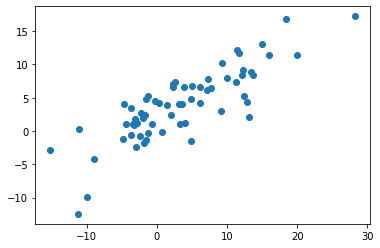

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)

RMSE =  4.8200130928067235


In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  133.91059834766187 %


In [ ]:
#sns.pairplot(df,x_vars=df.columns[0:8],y_vars=df.columns[8])

##Conclusion : 

*   RMSE Better than V.0 : 0.009286991260587

*   MAPE : 7.1156831159575



MAPE	Interpretation
< 10 %	Very good
10 % - 20 %	Good
20 % - 50 %	OK
> 50 %	Not good

RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy.